# 이미지 인식- 딥러닝

## MNIST 사례

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [12]:
(X_train, Y_class_train), (X_test, Y_class_test)= mnist.load_data()

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

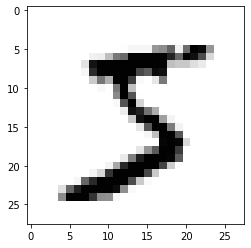

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [15]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [16]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [17]:
X_train.shape

(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [19]:
Y_class_train[0]

5

In [20]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [22]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [35]:
# 모델 프레임 설정
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [26]:
modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [28]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from 0.05888 to 0.01866, saving model to ./model/mnist01-0.0187.hdf5

Epoch 00002: val_loss improved from 0.01866 to 0.00623, saving model to ./model/mnist02-0.0062.hdf5

Epoch 00003: val_loss improved from 0.00623 to 0.00408, saving model to ./model/mnist03-0.0041.hdf5

Epoch 00004: val_loss improved from 0.00408 to 0.00291, saving model to ./model/mnist04-0.0029.hdf5

Epoch 00005: val_loss improved from 0.00291 to 0.00267, saving model to ./model/mnist05-0.0027.hdf5

Epoch 00006: val_loss improved from 0.00267 to 0.00250, saving model to ./model/mnist06-0.0025.hdf5

Epoch 00007: val_loss did not improve from 0.00250

Epoch 00008: val_loss did not improve from 0.00250

Epoch 00009: val_loss did not improve from 0.00250

Epoch 00010: val_loss did not improve from 0.00250

Epoch 00011: val_loss improved from 0.00250 to 0.00249, saving model to ./model/mnist11-0.0025.hdf5

Epoch 00012: val_loss did not improve from 0.00249

Epoch 00013: val_loss did not im

In [29]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/mnist11-0.0025.hdf5')

In [30]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0720 - accuracy: 0.9833

 Test Accuracy: 0.9833


In [31]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

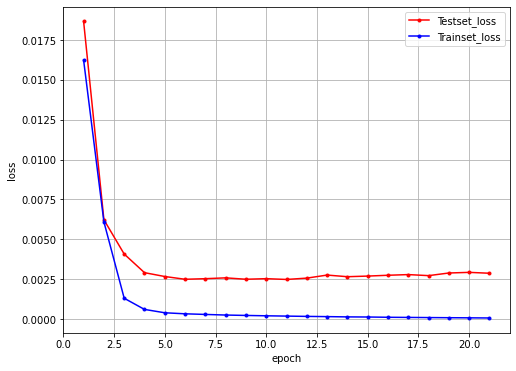

In [32]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()